In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import tf_tutorial.Data as Data
#from keras.optimizers import SGD


/home/mofassir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Called


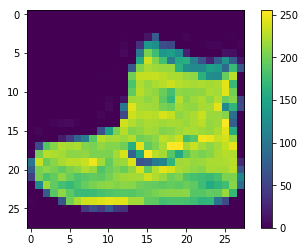

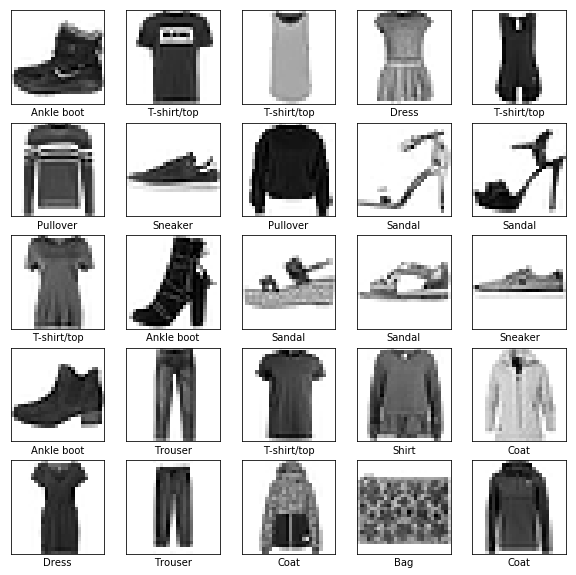

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
data = Data.Data()
train_images,train_labels,test_images,test_labels= data.get_data()

In [13]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax) ])
sgd = keras.optimizers.SGD()
#lr=0.01, decay=1e-6, momentum=0.9, nesterov=True

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=12)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Epoch 1/12
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5010 - acc: 0.8216
Epoch 2/12
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3743 - acc: 0.8654
Epoch 3/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3457 - acc: 0.8772
Epoch 4/12
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3301 - acc: 0.8842
Epoch 5/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3175 - acc: 0.8899
Epoch 6/12
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3080 - acc: 0.8931
Epoch 7/12
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2993 - acc: 0.8966
Epoch 8/12
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2927 - acc: 0.8992
Epoch 9/12
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2871 - acc: 0.9007
Epoch 10/12
60000/60000 [==============================] - 5s 82us/sample - loss: 

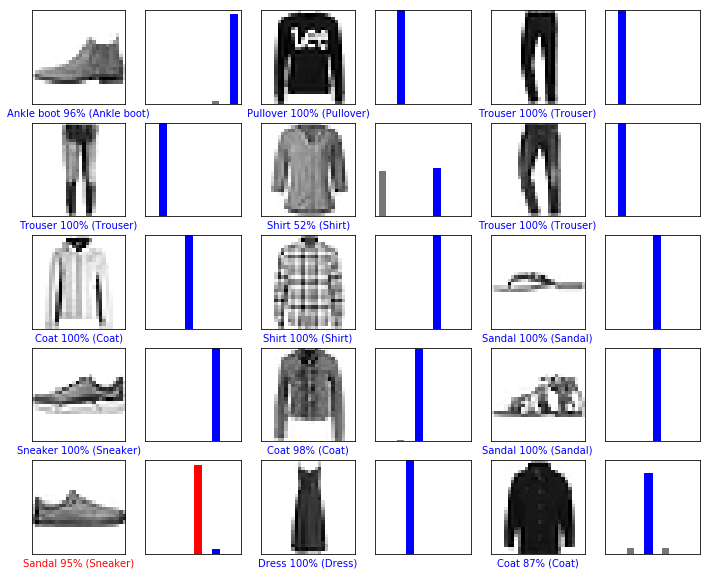

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()